In [12]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [3]:
load_dotenv()

user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
database = os.getenv("DB_DATABASE")

In [42]:
engine = create_engine(
    f"mariadb+mysqldb://{user}:{password}@{host}:{port}/{database}"
)

issue = pd.read_sql_table("Issue", engine) # "ID", "Title", "Description", "Status", "Resolution", "Last_Updated"
comment = pd.read_sql_table("Comment", engine) # "Issue_ID", "Comment"

In [44]:
print(f"Nombre d'issue : {issue.shape[0]}")
print(f"Nombre de features Issue : {issue.shape[1]}")
print("\n")
print(f"Nombre de commentaires : {comment.shape[0]}")
print(f"Nombre de features dans la table Comment : {comment.shape[1]}")
print("\n")
print(issue.dtypes)
print("\n")
print(comment.dtypes)

Nombre d'issue : 458232
Nombre de features Issue : 30


Nombre de commentaires : 1518327
Nombre de features dans la table Comment : 7


ID                                               int64
Jira_ID                                          int64
Issue_Key                                       object
URL                                             object
Title                                           object
Description                                     object
Description_Text                                object
Description_Code                                object
Type                                            object
Priority                                        object
Status                                          object
Resolution                                      object
Creation_Date                           datetime64[ns]
Estimation_Date                         datetime64[ns]
Resolution_Date                         datetime64[ns]
Last_Updated                           

In [7]:
issue.describe()

,ID,Jira_ID,Creation_Date,Estimation_Date,Resolution_Date,Last_Updated,Story_Point,Timespent,In_Progress_Minutes,Total_Effort_Minutes,Resolution_Time_Minutes,Title_Changed_After_Estimation,Description_Changed_After_Estimation,Story_Point_Changed_After_Estimation,Creator_ID,Reporter_ID,Assignee_ID,Project_ID,Sprint_ID
count,458232.000000,4.582320e+05,458232,65427,352632,458232,6.542700e+04,10243.000000,4.582320e+05,4.582320e+05,4.582320e+05,458232.000000,458232.0,458232.000000,456641.000000,455736.000000,261831.000000,458232.000000,43475.000000
mean,250427.756628,6.842263e+05,2014-04-25 10:20:30.745779968,2016-10-11 02:50:38.484784384,2015-01-17 07:35:58.695246336,2017-10-16 16:03:56.466746368,4.135718e+02,323.090501,5.238023e+03,2.343935e+04,4.084872e+05,0.141330,0.0,0.020068,120547.190712,120825.496105,133827.102066,24.998507,2711.075791
min,65.000000,1.000000e+04,2002-02-08 04:45:00,2004-07-08 10:38:38,2004-02-12 23:48:28,2002-08-04 02:02:50,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,68.000000,68.000000,71.000000,1.000000,1.000000
25%,114626.750000,5.834075e+04,2011-10-20 09:26:30.500000,2015-02-03 15:20:59.500000,2012-07-19 12:52:00,2016-07-12 00:30:12.750000128,1.000000e+00,46.000000,0.000000e+00,0.000000e+00,4.000000e+00,0.000000,0.0,0.000000,73529.000000,74305.000000,116063.000000,18.000000,1395.500000
50%,229184.500000,1.471675e+05,2014-09-02 12:20:13,2017-01-19 02:10:51,2015-06-09 08:33:02.500000,2018-11-26 12:21:40,3.000000e+00,120.000000,0.000000e+00,0.000000e+00,1.535700e+04,0.000000,0.0,0.000000,145748.000000,145748.000000,151325.000000,23.000000,2941.000000
75%,394473.250000,6.167282e+05,2017-07-22 19:51:16.249999872,2018-09-10 22:02:46.500000,2018-03-27 11:24:24.249999872,2019-09-19 06:46:56,5.000000e+00,300.000000,0.000000e+00,1.458000e+03,2.634485e+05,0.000000,0.0,0.000000,164408.000000,164408.000000,166050.000000,34.000000,4053.000000
max,509035.000000,1.333610e+07,2020-10-23 22:13:07,2020-10-22 14:51:07,2020-10-23 04:53:21,2020-10-24 13:46:06,2.671011e+07,24622.000000,4.771423e+06,4.806555e+06,9.156071e+06,1.000000,0.0,1.000000,209125.000000,209125.000000,208978.000000,44.000000,5027.000000
std,154217.334318,2.121512e+06,NaN,NaN,NaN,NaN,1.044232e+05,761.792096,5.792574e+04,1.286546e+05,8.887023e+05,0.348362,0.0,0.140235,62373.774892,62234.714879,60001.012434,10.805999,1512.380726


In [47]:
comment.describe()

,ID,Creation_Date,Author_ID,Issue_ID
count,1.518327e+06,1517576,1.518268e+06,1.518327e+06
mean,8.281584e+05,2014-10-22 18:55:50.868644864,1.291434e+05,2.762590e+05
min,4.441000e+03,2002-02-08 05:02:00,6.800000e+01,6.800000e+01
25%,3.977005e+05,2012-07-29 13:48:02.249999872,9.762400e+04,1.523200e+05
50%,8.731130e+05,2015-02-02 22:33:04,1.513180e+05,3.268970e+05
75%,1.252694e+06,2017-09-07 00:25:00.500000,1.581930e+05,3.776260e+05
max,1.634008e+06,2020-10-24 13:46:06,2.091240e+05,5.090340e+05
std,4.838541e+05,NaN,5.608961e+04,1.427036e+05


In [48]:
issue.dtypes

ID                                               int64
Jira_ID                                          int64
Issue_Key                                       object
URL                                             object
Title                                           object
Description                                     object
Description_Text                                object
Description_Code                                object
Type                                            object
Priority                                        object
Status                                          object
Resolution                                      object
Creation_Date                           datetime64[ns]
Estimation_Date                         datetime64[ns]
Resolution_Date                         datetime64[ns]
Last_Updated                            datetime64[ns]
Story_Point                                    float64
Timespent                                      float64
In_Progres

In [52]:
comment.dtypes

ID                        int64
Comment                  object
Comment_Text             object
Comment_Code             object
Creation_Date    datetime64[ns]
Author_ID               float64
Issue_ID                  int64
dtype: object

In [49]:
issue_clean = issue[["ID", "Title", "Description", "Status", "Resolution", "Last_Updated"]]
issue_clean.head()

,ID,Title,Description,Status,Resolution,Last_Updated
0,65,"""How do I make a job restartable in spring xd""","""The jobs that appear under Executions section...",To Do,None,2017-07-10 13:41:25
1,66,"""admin config timezone command does not work""","""Working with Spring-XD version 1.3.2.RELEASE ...",To Do,None,2017-06-26 16:26:27
2,67,"""Module Upload command not pushing jar to all ...","""My project 7 node cluster and in that 2 node ...",To Do,None,2017-05-19 22:28:43
3,68,"""Fix stream failover ""","""See https://github.com/spring-projects/spring...",Done,Complete,2017-03-22 18:27:01
4,69,"""SpringXD Job is still executing even after fo...","""I'm trying to run a Job on SpringXD and the j...",To Do,None,2017-03-06 20:01:41


In [46]:
comment_clean = comment[["Issue_ID", "Comment"]]
comment_clean.head()

,Issue_ID,Comment
0,68,See https://github.com/spring-projects/spring-...
1,73,Please refer to the attached document. We will...
2,73,Thanks Sabby. I tried structuring the AD to th...
3,73,Notice the following piece of code (https://gi...
4,75,Hi [~<USER>: \n\nCan you confirm you have the ...


In [50]:
issue_clean["Status"].unique()

array(['To Do', 'Done', 'In PR', 'In Progress', 'Open', 'Closed',
       'Resolved', 'Waiting for Feedback', 'New', 'In Development',
       'Waiting for Review', 'To Be Tested', 'Testing In Progress', 'Raw',
       'Ready for Development', 'Refine', 'Ready to Groom', 'Accepted',
       'Reviewable', 'Patch Available', 'Reopened', 'In Review',
       'Gathering Interest', 'Needs Triage', 'Long Term Backlog',
       'Short Term Backlog', 'Gathering Impact', 'Under Consideration',
       'Future Consideration', 'Waiting for Release',
       'Not Being Considered', 'Reviewing', 'Awaiting Release',
       'Published', 'Awaiting Merge', 'Complete', 'Backlog', 'Planning',
       'To Test', 'Code Review', 'To Develop', 'Unverified',
       'In CR Review', 'Returned', 'Reviewed', 'Invalid', "Won't Fix",
       'Selected for Development', 'Debugging With Submitter',
       'Ready for Work', 'Scoping', 'In Code Review', 'Investigating',
       'Waiting (Blocked)', 'Waiting for Reporter', 'Schedu

In [51]:
status_values = issue_clean["Status"].value_counts()
status_values_clean = status_values[status_values > 10]
status_values_clean

Status
Closed                     334368
Gathering Interest          27238
Done                        26825
Open                        24922
Resolved                    11548
Gathering Impact             8303
Complete                     5151
To Do                        4909
Won't Fix                    1932
Needs Triage                 1488
Long Term Backlog            1452
New                          1219
In Progress                  1204
Invalid                       984
Reopened                      877
Not Being Considered          862
Backlog                       859
Accepted                      825
Short Term Backlog            497
Development in progress       402
Under Consideration           339
Planned Development           318
Future Consideration          231
Reviewable                    177
In Review                     152
Needs Scheduling              137
To Develop                    135
In Code Review                100
In CR Review                   75
Waiting

<Axes: xlabel='Status'>

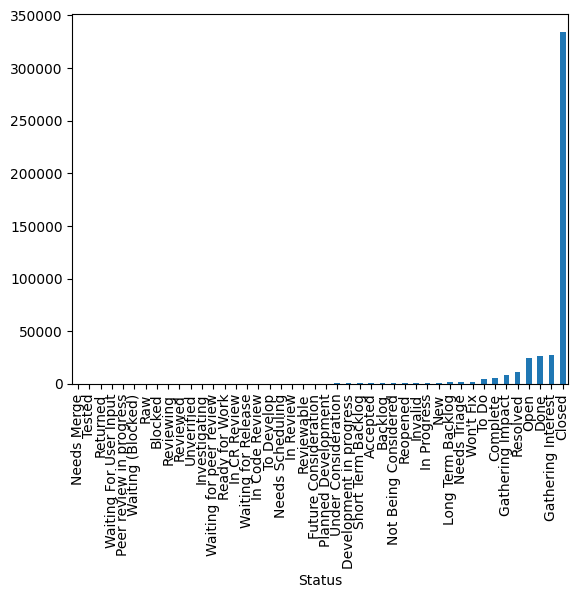

In [34]:
status_values_clean.sort_values().plot(kind='bar') 

In [55]:
issue_clean["Resolution"].unique()

array([None, 'Complete', 'Invalid', 'Works as Designed', 'Deferred',
       "Won't Fix", 'Cannot Reproduce', 'Incomplete', 'Duplicate',
       'Fixed', 'Done', 'Not A Bug', 'Automatically Closed', 'Parked',
       'Out of scope', "Won't Do", 'Resolved', 'Not A Problem',
       'Implemented', 'Information Provided', 'Later', 'Abandoned',
       'Feedback Received', 'Workaround', 'Works for Me',
       'Pending Closed', 'Not Our Bug', 'Needs more info', 'Hold',
       'Tracked Elsewhere', 'Handled by Support', 'Obsolete', 'Not a bug',
       'Support Request', 'Answered', 'Timed out', 'Resolved Locally',
       'Unsolved Mysteries', 'Incorrectly Filed', 'Deployed', 'Spam',
       'Invalid: Works as Expected', 'Invalid: Environment Issue',
       'Invalid: Test Error', 'Invalid: Not Supported', 'Ready for Test',
       'Ready for Release', 'Community Answered', 'Declined', 'Gone away',
       'Inactive', 'Completed', "Won't Fix or Usage Issue", 'Rejected',
       'Unresolved'], dtype=obje

In [54]:
resolution_values = issue_clean["Resolution"].value_counts()
resolution_values_clean = resolution_values[resolution_values > 10]
resolution_values_clean

Resolution
Fixed                         160857
Done                           43256
Won't Fix                      40816
Duplicate                      33166
Won't Do                       15709
Timed out                      11648
Cannot Reproduce               10917
Answered                        9292
Complete                        7149
Obsolete                        7145
Not a bug                       6910
Invalid                         6826
Support Request                 4230
Works as Designed               3195
Gone away                       2640
Incomplete                      2372
Tracked Elsewhere               2283
Won't Fix or Usage Issue        2151
Inactive                        1894
Handled by Support              1493
Completed                       1378
Deferred                        1129
Resolved Locally                 707
Unresolved                       547
Needs more info                  452
Not Our Bug                      395
Not A Bug                  

In [ ]:
# Complete, Resolved, Answered, Done, Fixed 
# Deployed, Implemented, Community Answered, Invalid: Works as Expected, Not A Bug, Resolved Locally, Completed, Handled by Support
# Won't Fix or Usage Issue, Works as Designed, Support Request, Not a bug, Won't Fix

<Axes: xlabel='Status'>

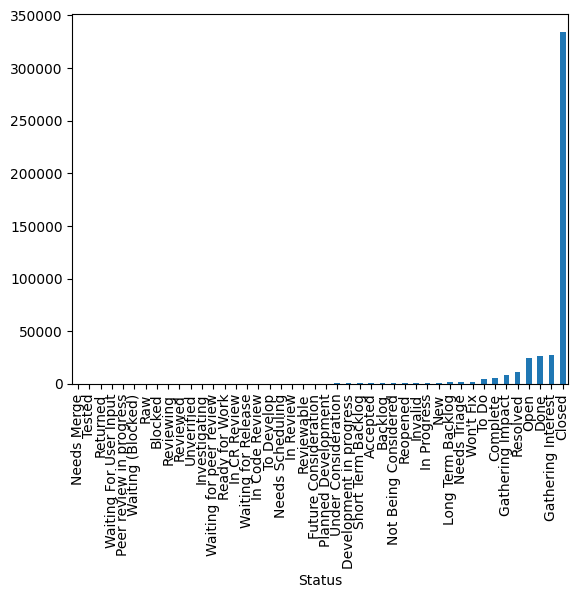

In [37]:
resolution_values_clean.sort_values().plot(kind='bar') 

In [73]:
df = issue_clean.merge(comment_clean, left_on='ID', right_on='Issue_ID')
df = df.dropna(subset=['Resolution'])
df.head()

,ID,Title,Description,Status,Resolution,Last_Updated,Issue_ID,Comment
0,68,"""Fix stream failover ""","""See https://github.com/spring-projects/spring...",Done,Complete,2017-03-22 18:27:01,68,See https://github.com/spring-projects/spring-...
13,85,"""Unable to register the JMX bean MessageHistor...","""If I try to use <int:message-history/> when d...",Done,Complete,2016-12-23 14:49:45,85,This is a bug in the {{ModuleObjectNamingStrat...
14,92,"""[Flo] Stream creation/definitions doesn't sho...",""" As a Flo for Spring XD user, I would like to...",Done,Complete,2016-02-21 02:28:36,92,Hi [~<USER>: Latest Chrome update requires upg...
15,93,"""Kafka message bus maxWait property is not set...","""The maxWait property from server.yml in the m...",Done,Complete,2016-02-21 02:28:22,93,The property is not set up in the kafka-bus.xm...
16,96,"""REST - Do not redirect after logout""","""In the following PR we removed the *RestLogou...",Done,Complete,2016-02-03 19:55:37,96,Merged as https://github.com/spring-projects/s...


In [74]:
df.shape

(1316995, 8)

In [ ]:
group_by_ID = df.groupby(["ID"])

print(group_by_ID.ngroups)
for issue_id in group_by_ID.groups.keys():
    print(f"Issue ID : {issue_id}")
    print(f"Nombre de commentaires : {len(group_by_ID.get_group(issue_id))}")

325992
Issue ID : 68


/tmp/ipykernel_156435/2914365260.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  print(f"Nombre de commentaires : {len(group_by_ID.get_group(issue_id))}")


Nombre de commentaires : 1
Issue ID : 85
Nombre de commentaires : 1
Issue ID : 92
Nombre de commentaires : 1
Issue ID : 93
Nombre de commentaires : 1
Issue ID : 96
Nombre de commentaires : 1
Issue ID : 101
Nombre de commentaires : 2
Issue ID : 103
Nombre de commentaires : 1
Issue ID : 112
Nombre de commentaires : 2
Issue ID : 114
Nombre de commentaires : 3
Issue ID : 118
Nombre de commentaires : 1
Issue ID : 124
Nombre de commentaires : 4
Issue ID : 127
Nombre de commentaires : 1
Issue ID : 146
Nombre de commentaires : 1
Issue ID : 147
Nombre de commentaires : 2
Issue ID : 148
Nombre de commentaires : 1
Issue ID : 149
Nombre de commentaires : 6
Issue ID : 150
Nombre de commentaires : 1
Issue ID : 153
Nombre de commentaires : 8
Issue ID : 158
Nombre de commentaires : 1
Issue ID : 161
Nombre de commentaires : 2
Issue ID : 162
Nombre de commentaires : 1
Issue ID : 165
Nombre de commentaires : 1
Issue ID : 167
Nombre de commentaires : 1
Issue ID : 168
Nombre de commentaires : 1
Issue ID : 